In [1]:
# import sensingbee as sb
import sys
sys.path.append('/home/adelsondias/Repos/sensingbee/sensingbee')
import source as sb
import utils 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

configuration__ = {
    'DATA_FOLDER':'/home/adelsondias/Repos/newcastle/air-quality/data_1week1/',
    'SHAPE_PATH':'/home/adelsondias/Repos/newcastle/air-quality/shape/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales.shp',
    'neighborhoods_path': '/home/adelsondias/Repos/newcastle/air-quality/shape/Lower_Layer_Super_Output_Areas_December_2011_Full_Extent__Boundaries_in_England_and_Wales/Lower_Layer_Super_Output_Areas_December_2011_Full_Extent__Boundaries_in_England_and_Wales.shp',
    'Sensors__frequency':'D',
    'Sensors__variables': ['NO2','Temperature','PM2.5'],
    'Sensors__threshold_callibration': {'Temperature':25, 'NO2':80, 'PM2.5':15},
    'Geography__filter_column':'msoa11nm',
    'Geography__filter_label':'Newcastle upon Tyne',
    'Geography__meshgrid':{'dimensions':[50,50], 'longitude_range':[-1.8, -1.51], 'latitude_range':[54.96, 55.05]},
    'osm_bbox': '(54.96,-1.8,55.05,-1.51)',
    'osm_line_objs': ['primary','trunk','motorway','residential'],
    'osm_point_objs': ['traffic_signals','crossing']
}

In [2]:
sensors = sb.Sensors(configuration__, mode='load', path=configuration__['DATA_FOLDER'], delimit_quantiles=True)
sensors.data.head()

Value
Variable Sensor Name     Timestamp            
NO2      amey_emote_1505 2018-07-31  92.087641
                         2018-08-01  62.828326
                         2018-08-02  54.377213
                         2018-08-03  84.743326
                         2018-08-04  44.011492

In [3]:
geography = sb.Geography(configuration__, 'load', sensors)

sensors.delimit_sensors_by_geography(geography.city)
sensors.delimit_sensors_by_osm_quantile(osm_args={
                    'Geography': geography,
                    'line_objs': configuration__['osm_line_objs'],
                    'point_objs': configuration__['osm_point_objs']
                })

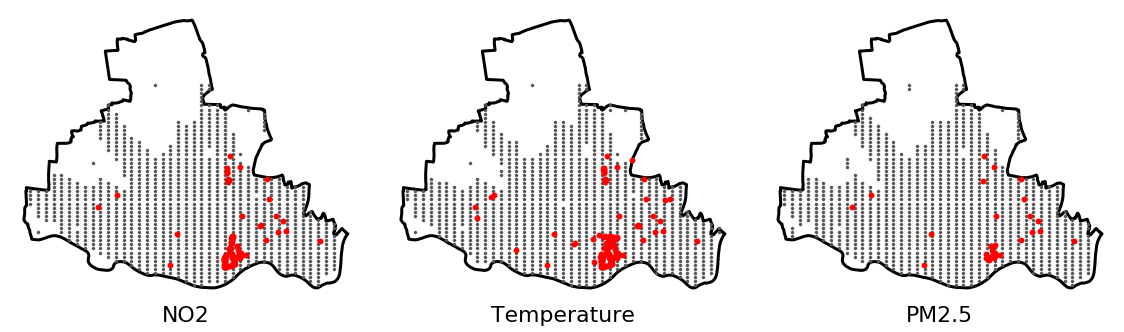

In [42]:
fig, ax = plt.subplots(ncols=3, figsize=[16,5])

geography.city.plot(ax=ax[0],color='white', linewidth=3, edgecolor='black')
# geography.lines.plot(ax=ax[0],color='#333333',markersize=10)
geography.meshgrid['NO2'].plot(ax=ax[0],color='#555555',markersize=10)
sensors.sensors.loc[sensors.data.loc['NO2'].index.get_level_values(0)].drop_duplicates(['lat','lon']).plot(ax=ax[0],color='red')
ax[0].set_xlabel('NO2', fontsize=22)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.setp(ax[0].get_yticklabels(), visible=False)
ax[0].tick_params(axis='both', which='both', length=0)

geography.city.plot(ax=ax[1],color='white', linewidth=3, edgecolor='black')
geography.meshgrid['Temperature'].plot(ax=ax[1],color='#555555',markersize=10)
sensors.sensors.loc[sensors.data.loc['Temperature'].index.get_level_values(0)].drop_duplicates(['lat','lon']).plot(ax=ax[1],color='red')
ax[1].set_xlabel('Temperature', fontsize=22)
plt.setp(ax[1].get_xticklabels(), visible=False)
plt.setp(ax[1].get_yticklabels(), visible=False)
ax[1].tick_params(axis='both', which='both', length=0)

geography.city.plot(ax=ax[2],color='white', linewidth=3, edgecolor='black')
geography.meshgrid['PM2.5'].plot(ax=ax[2],color='#555555',markersize=10)
sensors.sensors.loc[sensors.data.loc['PM2.5'].index.get_level_values(0)].drop_duplicates(['lat','lon']).plot(ax=ax[2],color='red')
ax[2].set_xlabel('PM2.5', fontsize=22)
plt.setp(ax[2].get_xticklabels(), visible=False)
plt.setp(ax[2].get_yticklabels(), visible=False)
ax[2].tick_params(axis='both', which='both', length=0)

sns.despine(offset=0, trim=True,  left=True, bottom=True);
sns.set_context("paper", font_scale=2)
plt.tight_layout()

plt.savefig('plots/meshgrids.eps',dpi=500)

In [4]:
features = sb.Features(configuration__, mode='load', Sensors=sensors, Geography=geography)

In [7]:
# osm_df = sb.Features({},mode=None).make_osm_features(**{
#                 'Geography': geography,
#                 'input_pointdf': sensors.sensors,
#                 'line_objs': configuration__['osm_line_objs'],
#                 'point_objs': configuration__['osm_point_objs']
#             })


NameError: name 'osm_df' is not defined

## Urbanicity distribution

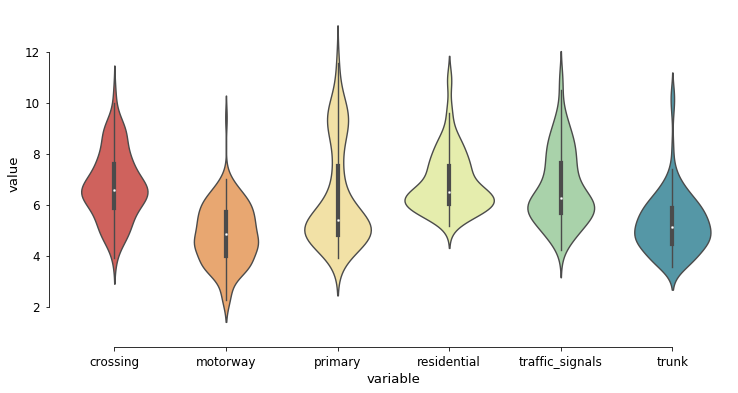

In [187]:
idx = pd.IndexSlice
import numpy as np

fig, ax = plt.subplots(figsize=(12,6))
x = features.zx.loc[idx[:,'2018-08-01'],['primary','trunk','motorway','residential','traffic_signals','crossing']]
y = x.melt()
sns.violinplot(data=y, y=np.log(y['value']), x='variable', ax=ax, palette='Spectral',order=['crossing','motorway','primary','residential','traffic_signals','trunk'])
sns.despine(offset=10, trim=True);
sns.set_context("paper", font_scale=1.5)
plt.savefig('plots/violinplot.eps',dpi=500)
# a = np.log(x.quantile(0.5))
# ax.scatter(x=a.index,y=a.values,marker='*',color='r',s=150)

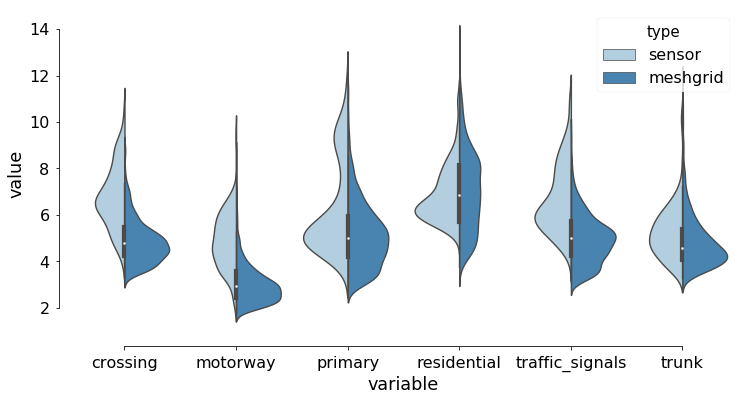

In [185]:
# # x.melt()
# geography.make_meshgrid(dimensions=(50,50), longitude_range=[-1.8, -1.51], latitude_range=[54.96, 55.05])
# osm_df = sb.Features({},mode=None).make_osm_features(**{
#                 'Geography': geography,
#                 'input_pointdf': geography.meshgrid,
#                 'line_objs': configuration__['osm_line_objs'],
#                 'point_objs': configuration__['osm_point_objs']
#             })
# geography.meshgrid = geography.meshgrid.loc[osm_df.index].join(osm_df)
# # geography.meshgrid.plot()
# # geography.meshgrid



# xm = geography.meshgrid[['crossing','motorway','primary','residential','traffic_signals','trunk']]
# ym = xm.melt()
y['type'] = ['sensor']*len(y)
ym['type'] = ['meshgrid']*len(ym)
Y = y.append(ym)

fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(data=Y, y=np.log(Y['value']), x='variable', hue='type',ax=ax,split=True, palette='Blues',order=['crossing','motorway','primary','residential','traffic_signals','trunk'])
sns.despine(offset=10, trim=True);
sns.set_context("paper", font_scale=3)
plt.savefig('plots/violinplot2.eps',dpi=500)

In [190]:
geography.meshgrid.head()

,lon,lat,geometry,primary,trunk,motorway,residential,traffic_signals,crossing
26,-1.646122,54.96,POINT (-1.646122448979592 54.96),328.135104,35.340869,26.245615,176.419502,209.478928,113.400584
27,-1.640204,54.96,POINT (-1.640204081632653 54.96),357.215382,36.265511,30.007459,219.505527,327.833202,103.775661
28,-1.634286,54.96,POINT (-1.634285714285714 54.96),303.612687,38.330518,35.993358,250.155833,300.272497,89.716038
29,-1.628367,54.96,POINT (-1.628367346938776 54.96),225.756088,44.899014,44.603440,193.560858,211.958397,149.902638
42,-1.551429,54.96,POINT (-1.551428571428571 54.96),202.769275,27.041831,17.895290,700.382962,86.402005,61.995450
